# Actual Evapotranspiration

In [1]:
import pygeohydro as gh
from pynhd import NLDI

The daily actual evapotranspiration can be retrieved from [SEEBop](https://earlywarning.usgs.gov/ssebop/modis/daily) database. Note that since this service does not offer a web service and data are available as raster files on the server, so this function is not as fast as other functions and download speed might be the bottleneck.

You can get the actual ET for location using ``ssebopeta_byloc`` and for a region using ``ssebopeta_bygeom``. Let's get a watershed geometry using NLDI and then get the actual ET.

In [2]:
geometry = NLDI().get_basins("01315500").geometry[0]

In [3]:
dates = ("2005-10-01", "2005-10-05")
coords = (geometry.centroid.x, geometry.centroid.y)
eta_p = gh.ssebopeta_byloc(coords, dates=dates)
eta_g = gh.ssebopeta_bygeom(geometry, dates=dates)

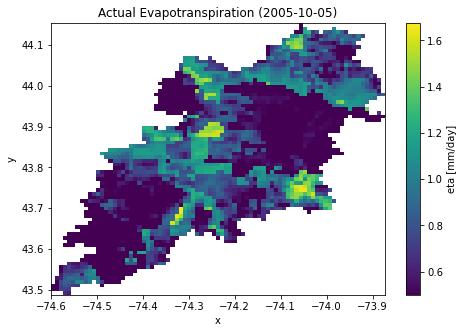

In [4]:
ax = eta_g.isel(time=4).plot(size=5)
date = eta_g.isel(time=4).time.dt.strftime("%Y-%m-%d").values
ax.axes.set_title(f"Actual Evapotranspiration ({date})")
ax.figure.savefig("_static/eta.png", bbox_inches="tight", facecolor="w")